<a href="https://colab.research.google.com/github/Tonry12/data_science_bootcamp_8_tonnaw/blob/main/lo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

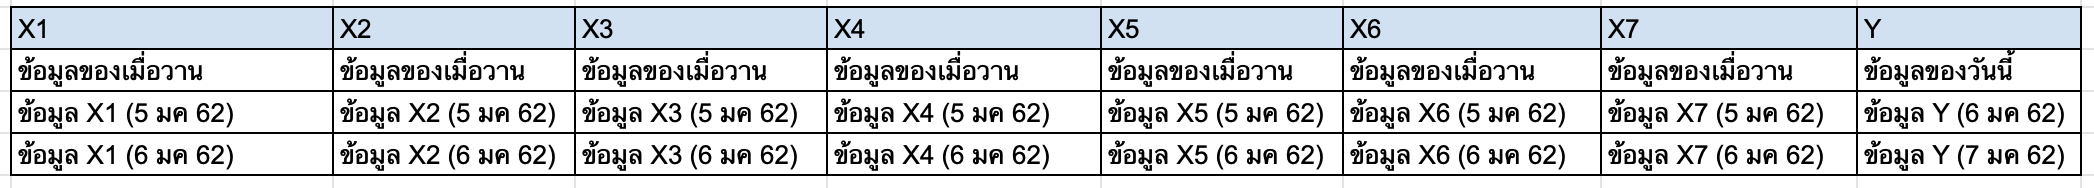

In [983]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [984]:
import numpy as np

In [985]:
#นำข้อมูลเข้า

#1.จังหวัดขอนแก่น
press_kk = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', skiprows=[0,1,2,3]) #ความกดอากาศ
Humidity_kk = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', skiprows=[0,1,2,3]) #ความชื้นสัมพัทธ์
ws_kk =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', skiprows=[0,1,2,3]) #ความเร็วลม
cd_kk =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', skiprows=[0,1,2,3]) #จำนวนเมฆ
dp_kk =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิจุดน้ำค้าง
bt_kk=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิตุ้มแห้ง
lw_kk=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิต่ำสุด
rain_kk=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', skiprows=[0,1,2,3]) #ปริมาณฝน

#2.จังหวัดนครพนม
press_nkpanom = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', skiprows=[0,1,2,3]) #ความกดอากาศ
Humidity_nkpanom = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', skiprows=[0,1,2,3]) #ความชื้นสัมพัทธ์
ws_nkpanom =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', skiprows=[0,1,2,3]) #ความเร็วลม
cd_nkpanom =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', skiprows=[0,1,2,3]) #จำนวนเมฆ
dp_nkpanom =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิจุดน้ำค้าง
bt_nkpanom=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิตุ้มแห้ง
lw_nkpanom=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิต่ำสุด
rain_nkpanom=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', skiprows=[0,1,2,3]) #ปริมาณฝน

#3.จังหวัดสกลนคร
press_sknk = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', skiprows=[0,1,2,3]) #ความกดอากาศ
Humidity_sknk = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', skiprows=[0,1,2,3]) #ความชื้นสัมพัทธ์
ws_sknk =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', skiprows=[0,1,2,3]) #ความเร็วลม
cd_sknk =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', skiprows=[0,1,2,3]) #จำนวนเมฆ
dp_sknk =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิจุดน้ำค้าง
bt_sknk=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิตุ้มแห้ง
lw_sknk=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิต่ำสุด
rain_sknk=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', skiprows=[0,1,2,3]) #ปริมาณฝน

#4.จังหวัดหนองคาย
press_nongcry = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', skiprows=[0,1,2,3]) #ความกดอากาศ
Humidity_nongcry = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', skiprows=[0,1,2,3]) #ความชื้นสัมพัทธ์
ws_nongcry =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', skiprows=[0,1,2,3]) #ความเร็วลม
cd_nongcry =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', skiprows=[0,1,2,3]) #จำนวนเมฆ
dp_nongcry =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิจุดน้ำค้าง
bt_nongcry=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิตุ้มแห้ง
lw_nongcry=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิต่ำสุด
rain_nongcry=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', skiprows=[0,1,2,3]) #ปริมาณฝน

#5.จังหวัดเลย
press_loey = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', skiprows=[0,1,2,3]) #ความกดอากาศ
Humidity_loey = pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', skiprows=[0,1,2,3]) #ความชื้นสัมพัทธ์
ws_loey =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', skiprows=[0,1,2,3]) #ความเร็วลม
cd_loey =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', skiprows=[0,1,2,3]) #จำนวนเมฆ
dp_loey =  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิจุดน้ำค้าง
bt_loey=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิตุ้มแห้ง
lw_loey=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', skiprows=[0,1,2,3]) #อุณหภูมิต่ำสุด
rain_loey=  pd.read_excel('/content/drive/MyDrive/DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', skiprows=[0,1,2,3]) #ปริมาณฝน




# **Data Preparation**

## ต่อกันในแนวแกน X (merge)
- เราจะเตรียมข้อมูลไปทีละสภาพอากาศของในจังหวัดนั้น เช่น เตรียมข้อมูลของจังหวัดขอนแก่นในสภาพอากาศที่ 1 ,2,3,..., 8
- หลังจากได้มา 8 dataframe ของจังหวัดขอนแก่นแล้ว จะนำทั้ง 8 สภาพอากาศของจังหวัดขอนแก่น มา join เข้าด้วยกัน
- โดยตอนแรกจะแสดงให้เห็นการ join ของจังหวัดแก่นก่อน และหลังจากนั้นจะแสดงให้เห็นเพียง เซลเดียวต่อจังหวัด

### จังหวัดขอนแก่น
- จะทำการเตรียมข้อมูลทีละสภาพอากาศก่อน
- โดยจะแสดงขั้นตอนการเตรียมข้อมูลให้เห็นแค่ ความกดอากาศของจังหวัดขอนแก่น และหลังจากนั้นจะเป็นการรันใน เซลล์เดียว

#### ความกดอากาศ

In [986]:
press_kk.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


##### เมื่อตรวจดูข้อมูลเบื้องต้นแล้วจะพบว่าคอลัมน์ที่ 1,2,3 ไม่มีชื่อคอลัมน์ ดังนั้นเราจึงทำการเปลี่ยนชื่อคอลัมน์

In [987]:
press_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_kk.head()

,id,สถานี,เดือน-ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


#####  ทำการ split Date ออกมาให้เป็น year, moth เพื่อที่จะลบวันที่ที่ผิดออก และ ลบคอลัมน์เดิมออกทำการลบข้อมูลคอลัมน์ ค่าเฉลี่ยออก เนื่องจากมันเป็นการ เพิ่ม value ของข้อมูลให้มีค่ามากขึ้นกว่าที่ควรจะเป็น

In [988]:
press_kk['year'] = press_kk['เดือน-ปี'].dt.year
press_kk['month'] = press_kk['เดือน-ปี'].dt.month
press_kk = press_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_kk.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,2012,2


##### ต้องการทำให้วันที่ 1-30 มาอยู่ในแนว row แทนแนว column เพื่อที่จะได้ข้อมูลที่พร้อจะ merge กับสภาพอากาศอื่น

In [989]:
press_kk_melt = press_kk.set_index(['สถานี','id','year','month']).stack().reset_index() #stack วันที่
press_kk_melt.rename(columns={'level_4' : 'day'},inplace=True) #เปลี่ยนชื่อ col
press_kk_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True) #เปลี่ยนชื่อ col
press_kk_melt

,สถานี,id,year,month,day,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


##### ทำการสร้างคอลัมน์ที่เป็น id ของจังหวัด เพื่อที่เวลารวมให้เป็นตารางใหญ่ จะได้สามารถจำแนกได้ว่าเป็นจังหวัดไหน

In [990]:
press_kk_melt['province_id'] = len(press_kk_melt)*['kk']
press_kk_melt

,สถานี,id,year,month,day,ความกดอากาศ(%),province_id
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47,kk
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65,kk
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49,kk
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28,kk
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88,kk
...,...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37,kk
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04,kk
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37,kk
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98,kk


##### สร้าง Primarykey เพื่อที่เวลาจะ join ตารางจะได้สามารถ join ได้ เนื่องจากในข้อมูลของจังหวัดของแก่นทุกตารางมีขนาด col ที่เท่ากัน ดังนั้นจึงสามารถสร้าง key ขึ้นมาได้
- สร้างโดย reset_index เพื่อให้มีลักษณะของเลขที่ไม่ซ้ำกัน และนำมารวมกับ province_id

In [991]:
press_kk_in = press_kk_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_kk_in_re = press_kk_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_kk_in_re

,province_id,index,year,month,day,ความกดอากาศ(%)
0,kk,0,2011,10,1,1005.47
1,kk,1,2011,10,2,1006.65
2,kk,2,2011,10,3,1007.49
3,kk,3,2011,10,4,1008.28
4,kk,4,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,kk,1700,2022,2,27,1014.37
1701,kk,1701,2022,2,28,1013.04
1702,kk,1702,2022,2,29,1013.37
1703,kk,1703,2022,2,30,1013.98


In [992]:
press_kk_in_re["id"] = press_kk_in_re["province_id"].astype(str) +  press_kk_in_re["index"].astype(str)

<ipython-input-992-06c81e268830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_kk_in_re["id"] = press_kk_in_re["province_id"].astype(str) +  press_kk_in_re["index"].astype(str)


In [993]:
press_kk_fin = press_kk_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_kk_fin

,id,province_id,year,month,day,ความกดอากาศ(%)
0,kk0,kk,2011,10,1,1005.47
1,kk1,kk,2011,10,2,1006.65
2,kk2,kk,2011,10,3,1007.49
3,kk3,kk,2011,10,4,1008.28
4,kk4,kk,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,1014.37
1701,kk1701,kk,2022,2,28,1013.04
1702,kk1702,kk,2022,2,29,1013.37
1703,kk1703,kk,2022,2,30,1013.98


#### ความชื้นสัมพัทธ์


In [994]:
#ความชื้นสัมพัทธ์ ขอนแก่น

In [995]:
Humidity_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)

In [996]:
Humidity_kk['year'] = Humidity_kk['เดือน-ปี'].dt.year
Humidity_kk['month'] = Humidity_kk['เดือน-ปี'].dt.month
Humidity_kk = Humidity_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [997]:
Humidity_kk_melt = Humidity_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_kk_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_kk_melt.head()

,สถานี,id,year,month,day,ความชื้นสัมพัทธ์(%)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86


In [998]:
Humidity_kk_melt['province_id'] = len(Humidity_kk_melt)*['kk']

In [999]:
Humidity_kk_in = Humidity_kk_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_kk_in_re = Humidity_kk_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_kk_in_re

,province_id,index,year,month,day,ความชื้นสัมพัทธ์(%)
0,kk,0,2011,10,1,83
1,kk,1,2011,10,2,92
2,kk,2,2011,10,3,86
3,kk,3,2011,10,4,80
4,kk,4,2011,10,5,86
...,...,...,...,...,...,...
1700,kk,1700,2022,2,27,58
1701,kk,1701,2022,2,28,62
1702,kk,1702,2022,2,29,-
1703,kk,1703,2022,2,30,-


In [1000]:
Humidity_kk_in_re["id"] = Humidity_kk_in_re["province_id"].astype(str) +  Humidity_kk_in_re["index"].astype(str)

<ipython-input-1000-7979acf9468b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_kk_in_re["id"] = Humidity_kk_in_re["province_id"].astype(str) +  Humidity_kk_in_re["index"].astype(str)


In [1001]:
Humidity_kk_fin = Humidity_kk_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_kk_fin

,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,kk0,kk,2011,10,1,83
1,kk1,kk,2011,10,2,92
2,kk2,kk,2011,10,3,86
3,kk3,kk,2011,10,4,80
4,kk4,kk,2011,10,5,86
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,58
1701,kk1701,kk,2022,2,28,62
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


#### ความเร็วลม

In [1002]:
#ความเร็วลม

In [1003]:
ws_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)

ws_kk['year'] = ws_kk['เดือน-ปี'].dt.year
ws_kk['month'] = ws_kk['เดือน-ปี'].dt.month
ws_kk = ws_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

ws_kk_melt = ws_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_kk_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)

ws_kk_melt['province_id'] = len(ws_kk_melt)*['kk']

ws_kk_in = ws_kk_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_kk_in_re = ws_kk_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]

ws_kk_in_re["id"] = ws_kk_in_re["province_id"].astype(str) +  ws_kk_in_re["index"].astype(str)

ws_kk_fin = ws_kk_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_kk_fin


<ipython-input-1003-fa211a97655c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_kk_in_re["id"] = ws_kk_in_re["province_id"].astype(str) +  ws_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,kk0,kk,2011,10,1,3
1,kk1,kk,2011,10,2,2
2,kk2,kk,2011,10,3,3
3,kk3,kk,2011,10,4,2
4,kk4,kk,2011,10,5,2
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,2
1701,kk1701,kk,2022,2,28,2
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


#### จำนวนเมฆ

In [1004]:
#จำนวนเมฆ

In [1005]:
cd_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)


cd_kk['year'] = cd_kk['เดือน-ปี'].dt.year
cd_kk['month'] = cd_kk['เดือน-ปี'].dt.month
cd_kk = cd_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


cd_kk_melt = cd_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_kk_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)


cd_kk_melt['province_id'] = len(cd_kk_melt)*['kk']


cd_kk_in = cd_kk_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_kk_in_re = cd_kk_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]


cd_kk_in_re["id"] = cd_kk_in_re["province_id"].astype(str) +  cd_kk_in_re["index"].astype(str)


cd_kk_fin = cd_kk_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_kk_fin



<ipython-input-1005-6fcb56dd3338>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_kk_in_re["id"] = cd_kk_in_re["province_id"].astype(str) +  cd_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,kk0,kk,2011,10,1,9
1,kk1,kk,2011,10,2,10
2,kk2,kk,2011,10,3,10
3,kk3,kk,2011,10,4,8
4,kk4,kk,2011,10,5,10
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,2
1701,kk1701,kk,2022,2,28,2
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


#### อุณหภูมิจุดน้ำค้าง

In [1006]:
#อุณหภูมิจุดน้ำค้าง

In [1007]:
dp_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)


dp_kk['year'] = dp_kk['เดือน-ปี'].dt.year
dp_kk['month'] = dp_kk['เดือน-ปี'].dt.month
dp_kk = dp_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


dp_kk_melt = dp_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_kk_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)


dp_kk_melt['province_id'] = len(dp_kk_melt)*['kk']


dp_kk_in = dp_kk_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
dp_kk_in_re = dp_kk_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]


dp_kk_in_re["id"] = dp_kk_in_re["province_id"].astype(str) +  dp_kk_in_re["index"].astype(str)


dp_kk_fin = dp_kk_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dp_kk_fin



<ipython-input-1007-d6babe679d21>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_kk_in_re["id"] = dp_kk_in_re["province_id"].astype(str) +  dp_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk0,kk,2011,10,1,24.2
1,kk1,kk,2011,10,2,24.0
2,kk2,kk,2011,10,3,22.9
3,kk3,kk,2011,10,4,21.9
4,kk4,kk,2011,10,5,21.7
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,15.7
1701,kk1701,kk,2022,2,28,17.5
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


#### อุณหภูมิตุ้มแห้ง

In [1008]:
#อุณหภูมิตุ้มแห้ง

In [1009]:
bt_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)


bt_kk['year'] = bt_kk['เดือน-ปี'].dt.year
bt_kk['month'] = bt_kk['เดือน-ปี'].dt.month
bt_kk = bt_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


bt_kk_melt = bt_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_kk_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)


bt_kk_melt['province_id'] = len(bt_kk_melt)*['kk']


bt_kk_in = bt_kk_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
bt_kk_in_re = bt_kk_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]


bt_kk_in_re["id"] = bt_kk_in_re["province_id"].astype(str) +  bt_kk_in_re["index"].astype(str)


bt_kk_fin = bt_kk_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
bt_kk_fin



<ipython-input-1009-1e2e1757dc02>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_kk_in_re["id"] = bt_kk_in_re["province_id"].astype(str) +  bt_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,kk0,kk,2011,10,1,27.6
1,kk1,kk,2011,10,2,25.6
2,kk2,kk,2011,10,3,25.6
3,kk3,kk,2011,10,4,25.8
4,kk4,kk,2011,10,5,24.3
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,25.1
1701,kk1701,kk,2022,2,28,25.9
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


#### อุณหภูมิต่ำสุด

In [1010]:
#อุณหภูมิต่ำสุด

In [1011]:
lw_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)


lw_kk['year'] = lw_kk['เดือน-ปี'].dt.year
lw_kk['month'] = lw_kk['เดือน-ปี'].dt.month
lw_kk = lw_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


lw_kk_melt = lw_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_kk_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)


lw_kk_melt['province_id'] = len(lw_kk_melt)*['kk']


lw_kk_in = lw_kk_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
lw_kk_in_re = lw_kk_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]


lw_kk_in_re["id"] = lw_kk_in_re["province_id"].astype(str) +  lw_kk_in_re["index"].astype(str)


lw_kk_fin = lw_kk_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]
lw_kk_fin



<ipython-input-1011-3e8271463a43>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_kk_in_re["id"] = lw_kk_in_re["province_id"].astype(str) +  lw_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด(เซลเซียส)
0,kk0,kk,2011,10,1,24.8
1,kk1,kk,2011,10,2,23.0
2,kk2,kk,2011,10,3,22.1
3,kk3,kk,2011,10,4,22.8
4,kk4,kk,2011,10,5,23.1
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,18.2
1701,kk1701,kk,2022,2,28,-
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


#### ปริมาณน้ำฝน

In [1012]:
#ปริมาณน้ำฝน

In [1013]:
rain_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)


rain_kk['year'] = rain_kk['เดือน-ปี'].dt.year
rain_kk['month'] = rain_kk['เดือน-ปี'].dt.month
rain_kk = rain_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


rain_kk_melt = rain_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_kk_melt.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)


rain_kk_melt['province_id'] = len(rain_kk_melt)*['kk']


rain_kk_in = rain_kk_melt[['province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
rain_kk_in_re = rain_kk_in[['province_id','index','year','month','day','ปริมาณฝน(มิลลิเมตร)']]


rain_kk_in_re["id"] = rain_kk_in_re["province_id"].astype(str) +  rain_kk_in_re["index"].astype(str)


rain_kk_fin = rain_kk_in_re[['id','province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']]
rain_kk_fin



<ipython-input-1013-5023bc154da1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_kk_in_re["id"] = rain_kk_in_re["province_id"].astype(str) +  rain_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1.4
1,kk1,kk,2011,10,2,17.7
2,kk2,kk,2011,10,3,3
3,kk3,kk,2011,10,4,0
4,kk4,kk,2011,10,5,2.2
...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,0
1701,kk1701,kk,2022,2,28,-
1702,kk1702,kk,2022,2,29,-
1703,kk1703,kk,2022,2,30,-


In [1014]:
merged_df_kk = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(press_kk_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']],
            Humidity_kk_fin[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            ws_kk_fin[['id','ความเร็วลม(นอต)']], on='id'),
            cd_kk_fin[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            dp_kk_fin[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            bt_kk_fin[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']], on='id'),
            lw_kk_fin[['id','อุณหภูมิต่ำสุด(เซลเซียส)']], on='id'),
            rain_kk_fin[['id','ปริมาณฝน(มิลลิเมตร)']], on='id')
merged_df_kk

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,kk1,kk,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,kk2,kk,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,kk3,kk,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,kk4,kk,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,kk1700,kk,2022,2,27,1014.37,58,2,2,15.7,25.1,18.2,0
1701,kk1701,kk,2022,2,28,1013.04,62,2,2,17.5,25.9,-,-
1702,kk1702,kk,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,kk1703,kk,2022,2,30,1013.98,-,-,-,-,-,-,-


### จังหวัดนครพนม

In [1015]:
#ความกดอากาศ
press_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_nkpanom['year'] = press_nkpanom['เดือน-ปี'].dt.year
press_nkpanom['month'] = press_nkpanom['เดือน-ปี'].dt.month
press_nkpanom = press_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_nkpanom_melt = press_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
press_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_nkpanom_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_nkpanom_melt['province_id'] = len(press_nkpanom_melt)*['nkpanom']
press_nkpanom_in = press_nkpanom_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_nkpanom_in_re = press_nkpanom_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_nkpanom_in_re["id"] = press_nkpanom_in_re["province_id"].astype(str) +  press_nkpanom_in_re["index"].astype(str)
press_nkpanom_fin = press_nkpanom_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]

#ความชื้นสัมพัทธ์
Humidity_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_nkpanom['year'] = Humidity_nkpanom['เดือน-ปี'].dt.year
Humidity_nkpanom['month'] = Humidity_nkpanom['เดือน-ปี'].dt.month
Humidity_nkpanom = Humidity_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_nkpanom_melt = Humidity_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_nkpanom_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_nkpanom_melt['province_id'] = len(Humidity_nkpanom_melt)*['nkpanom']
Humidity_nkpanom_in = Humidity_nkpanom_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_nkpanom_in_re = Humidity_nkpanom_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nkpanom_in_re["id"] = Humidity_nkpanom_in_re["province_id"].astype(str) +  Humidity_nkpanom_in_re["index"].astype(str)
Humidity_nkpanom_fin = Humidity_nkpanom_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]

#ความเร็วลม
ws_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_nkpanom['year'] = ws_nkpanom['เดือน-ปี'].dt.year
ws_nkpanom['month'] = ws_nkpanom['เดือน-ปี'].dt.month
ws_nkpanom = ws_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_nkpanom_melt = ws_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_nkpanom_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_nkpanom_melt['province_id'] = len(ws_nkpanom_melt)*['nkpanom']
ws_nkpanom_in = ws_nkpanom_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_nkpanom_in_re = ws_nkpanom_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]
ws_nkpanom_in_re["id"] = ws_nkpanom_in_re["province_id"].astype(str) +  ws_nkpanom_in_re["index"].astype(str)
ws_nkpanom_fin = ws_nkpanom_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]



#จำนวนเมฆ
cd_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_nkpanom['year'] = cd_nkpanom['เดือน-ปี'].dt.year
cd_nkpanom['month'] = cd_nkpanom['เดือน-ปี'].dt.month
cd_nkpanom = cd_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
cd_nkpanom_melt = cd_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_nkpanom_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
cd_nkpanom_melt['province_id'] = len(cd_nkpanom_melt)*['nkpanom']
cd_nkpanom_in = cd_nkpanom_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_nkpanom_in_re = cd_nkpanom_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_nkpanom_in_re["id"] = cd_nkpanom_in_re["province_id"].astype(str) +  cd_nkpanom_in_re["index"].astype(str)
cd_nkpanom_fin = cd_nkpanom_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]


#อุณหภูมิจุดน้ำค้าง
dp_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_nkpanom['year'] = dp_nkpanom['เดือน-ปี'].dt.year
dp_nkpanom['month'] = dp_nkpanom['เดือน-ปี'].dt.month
dp_nkpanom = dp_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_nkpanom_melt = dp_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_nkpanom_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
dp_nkpanom_melt['province_id'] = len(dp_nkpanom_melt)*['nkpanom']
dp_nkpanom_in = dp_nkpanom_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
dp_nkpanom_in_re = dp_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dp_nkpanom_in_re["id"] = dp_nkpanom_in_re["province_id"].astype(str) +  dp_nkpanom_in_re["index"].astype(str)
dp_nkpanom_fin = dp_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]


#อุณหภูมิตุ้มแห้ง
bt_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_nkpanom['year'] = bt_nkpanom['เดือน-ปี'].dt.year
bt_nkpanom['month'] = bt_nkpanom['เดือน-ปี'].dt.month
bt_nkpanom = bt_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_nkpanom_melt = bt_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_nkpanom_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
bt_nkpanom_melt['province_id'] = len(bt_nkpanom_melt)*['nkpanom']
bt_nkpanom_in = bt_nkpanom_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
bt_nkpanom_in_re = bt_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
bt_nkpanom_in_re["id"] = bt_nkpanom_in_re["province_id"].astype(str) +  bt_nkpanom_in_re["index"].astype(str)
bt_nkpanom_fin = bt_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]


#อุณหภูมิต่ำสุด
lw_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_nkpanom['year'] = lw_nkpanom['เดือน-ปี'].dt.year
lw_nkpanom['month'] = lw_nkpanom['เดือน-ปี'].dt.month
lw_nkpanom = lw_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_nkpanom_melt = lw_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_nkpanom_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
lw_nkpanom_melt['province_id'] = len(lw_nkpanom_melt)*['nkpanom']
lw_nkpanom_in = lw_nkpanom_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
lw_nkpanom_in_re = lw_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]
lw_nkpanom_in_re["id"] = lw_nkpanom_in_re["province_id"].astype(str) +  lw_nkpanom_in_re["index"].astype(str)
lw_nkpanom_fin = lw_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]


#ปริมาณน้ำฝน
rain_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_nkpanom['year'] = rain_nkpanom['เดือน-ปี'].dt.year
rain_nkpanom['month'] = rain_nkpanom['เดือน-ปี'].dt.month
rain_nkpanom = rain_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_nkpanom_melt = rain_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_nkpanom_melt.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)
rain_nkpanom_melt['province_id'] = len(rain_nkpanom_melt)*['nkpanom']
rain_nkpanom_in = rain_nkpanom_melt[['province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
rain_nkpanom_in_re = rain_nkpanom_in[['province_id','index','year','month','day','ปริมาณฝน(มิลลิเมตร)']]
rain_nkpanom_in_re["id"] = rain_nkpanom_in_re["province_id"].astype(str) +  rain_nkpanom_in_re["index"].astype(str)
rain_nkpanom_fin = rain_nkpanom_in_re[['id','province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']]


#join
merged_df_nkpanom = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(press_nkpanom_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']],
            Humidity_nkpanom_fin[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            ws_nkpanom_fin[['id','ความเร็วลม(นอต)']], on='id'),
            cd_nkpanom_fin[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            dp_nkpanom_fin[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            bt_nkpanom_fin[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']], on='id'),
            lw_nkpanom_fin[['id','อุณหภูมิต่ำสุด(เซลเซียส)']], on='id'),
            rain_nkpanom_fin[['id','ปริมาณฝน(มิลลิเมตร)']], on='id')
merged_df_nkpanom



<ipython-input-1015-08406312a995>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_nkpanom_in_re["id"] = press_nkpanom_in_re["province_id"].astype(str) +  press_nkpanom_in_re["index"].astype(str)
<ipython-input-1015-08406312a995>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_nkpanom_in_re["id"] = Humidity_nkpanom_in_re["province_id"].astype(str) +  Humidity_nkpanom_in_re["index"].astype(str)
<ipython-input-1015-08406312a995>:46: SettingWithCopyWarning: 
A value is trying to be set on a c

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,nkpanom0,nkpanom,2011,10,1,1006.3,95,1,10,25.1,25.9,25.0,17
1,nkpanom1,nkpanom,2011,10,2,1007.38,84,1,7,23.1,26.1,23.4,0.3
2,nkpanom2,nkpanom,2011,10,3,1008.07,74,2,8,20.1,25.3,22.2,0
3,nkpanom3,nkpanom,2011,10,4,1008.44,72,2,8,18.9,24.7,20.6,0.3
4,nkpanom4,nkpanom,2011,10,5,1010.51,87,1,10,20.7,23.1,21.1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,nkpanom1700,nkpanom,2022,2,27,1016.43,52,2,1,13.2,24.1,18.1,0
1701,nkpanom1701,nkpanom,2022,2,28,1013.53,60,1,0,14.9,24.0,16,0
1702,nkpanom1702,nkpanom,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,nkpanom1703,nkpanom,2022,2,30,1013.98,-,-,-,-,-,-,-


### จังหวัดสกลนคร

In [1016]:
#ความกดอากาศ
press_sknk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_sknk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_sknk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_sknk['year'] = press_sknk['เดือน-ปี'].dt.year
press_sknk['month'] = press_sknk['เดือน-ปี'].dt.month
press_sknk = press_sknk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_sknk_melt = press_sknk.set_index(['สถานี','id','year','month']).stack().reset_index()
press_sknk_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_sknk_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_sknk_melt['province_id'] = len(press_sknk_melt)*['sknk']
press_sknk_in = press_sknk_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_sknk_in_re = press_sknk_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_sknk_in_re["id"] = press_sknk_in_re["province_id"].astype(str) +  press_sknk_in_re["index"].astype(str)
press_sknk_fin = press_sknk_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]

#ความชื้นสัมพัทธ์
Humidity_sknk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_sknk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_sknk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_sknk['year'] = Humidity_sknk['เดือน-ปี'].dt.year
Humidity_sknk['month'] = Humidity_sknk['เดือน-ปี'].dt.month
Humidity_sknk = Humidity_sknk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_sknk_melt = Humidity_sknk.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_sknk_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_sknk_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_sknk_melt['province_id'] = len(Humidity_sknk_melt)*['sknk']
Humidity_sknk_in = Humidity_sknk_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_sknk_in_re = Humidity_sknk_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_sknk_in_re["id"] = Humidity_sknk_in_re["province_id"].astype(str) +  Humidity_sknk_in_re["index"].astype(str)
Humidity_sknk_fin = Humidity_sknk_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]

#ความเร็วลม
ws_sknk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_sknk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_sknk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_sknk['year'] = ws_sknk['เดือน-ปี'].dt.year
ws_sknk['month'] = ws_sknk['เดือน-ปี'].dt.month
ws_sknk = ws_sknk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_sknk_melt = ws_sknk.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_sknk_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_sknk_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_sknk_melt['province_id'] = len(ws_sknk_melt)*['sknk']
ws_sknk_in = ws_sknk_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_sknk_in_re = ws_sknk_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]
ws_sknk_in_re["id"] = ws_sknk_in_re["province_id"].astype(str) +  ws_sknk_in_re["index"].astype(str)
ws_sknk_fin = ws_sknk_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]

#จำนวนเมฆ
cd_sknk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_sknk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_sknk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_sknk['year'] = cd_sknk['เดือน-ปี'].dt.year
cd_sknk['month'] = cd_sknk['เดือน-ปี'].dt.month
cd_sknk = cd_sknk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
cd_sknk_melt = cd_sknk.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_sknk_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_sknk_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
cd_sknk_melt['province_id'] = len(cd_sknk_melt)*['sknk']
cd_sknk_in = cd_sknk_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_sknk_in_re = cd_sknk_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_sknk_in_re["id"] = cd_sknk_in_re["province_id"].astype(str) +  cd_sknk_in_re["index"].astype(str)
cd_sknk_fin = cd_sknk_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]

#อุณหภูมิจุดน้ำค้าง
dp_sknk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_sknk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_sknk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_sknk['year'] = dp_sknk['เดือน-ปี'].dt.year
dp_sknk['month'] = dp_sknk['เดือน-ปี'].dt.month
dp_sknk = dp_sknk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_sknk_melt = dp_sknk.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_sknk_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_sknk_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
dp_sknk_melt['province_id'] = len(dp_sknk_melt)*['sknk']
dp_sknk_in = dp_sknk_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
dp_sknk_in_re = dp_sknk_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dp_sknk_in_re["id"] = dp_sknk_in_re["province_id"].astype(str) +  dp_sknk_in_re["index"].astype(str)
dp_sknk_fin = dp_sknk_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]

#อุณหภูมิตุ้มแห้ง
bt_sknk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_sknk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_sknk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_sknk['year'] = bt_sknk['เดือน-ปี'].dt.year
bt_sknk['month'] = bt_sknk['เดือน-ปี'].dt.month
bt_sknk = bt_sknk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_sknk_melt = bt_sknk.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_sknk_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_sknk_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
bt_sknk_melt['province_id'] = len(bt_sknk_melt)*['sknk']
bt_sknk_in = bt_sknk_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
bt_sknk_in_re = bt_sknk_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
bt_sknk_in_re["id"] = bt_sknk_in_re["province_id"].astype(str) +  bt_sknk_in_re["index"].astype(str)
bt_sknk_fin = bt_sknk_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]

#อุณหภูมิต่ำสุด
lw_sknk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_sknk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_sknk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_sknk['year'] = lw_sknk['เดือน-ปี'].dt.year
lw_sknk['month'] = lw_sknk['เดือน-ปี'].dt.month
lw_sknk = lw_sknk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_sknk_melt = lw_sknk.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_sknk_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_sknk_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
lw_sknk_melt['province_id'] = len(lw_sknk_melt)*['sknk']
lw_sknk_in = lw_sknk_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
lw_sknk_in_re = lw_sknk_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]
lw_sknk_in_re["id"] = lw_sknk_in_re["province_id"].astype(str) +  lw_sknk_in_re["index"].astype(str)
lw_sknk_fin = lw_sknk_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]

#ปริมาณน้ำฝน
rain_sknk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_sknk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_sknk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_sknk['year'] = rain_sknk['เดือน-ปี'].dt.year
rain_sknk['month'] = rain_sknk['เดือน-ปี'].dt.month
rain_sknk = rain_sknk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_sknk_melt = rain_sknk.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_sknk_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_sknk_melt.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)
rain_sknk_melt['province_id'] = len(rain_sknk_melt)*['sknk']
rain_sknk_in = rain_sknk_melt[['province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
rain_sknk_in_re = rain_sknk_in[['province_id','index','year','month','day','ปริมาณฝน(มิลลิเมตร)']]
rain_sknk_in_re["id"] = rain_sknk_in_re["province_id"].astype(str) +  rain_sknk_in_re["index"].astype(str)
rain_sknk_fin = rain_sknk_in_re[['id','province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']]

#join
merged_df_sknk = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(press_sknk_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']],
            Humidity_sknk_fin[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            ws_sknk_fin[['id','ความเร็วลม(นอต)']], on='id'),
            cd_sknk_fin[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            dp_sknk_fin[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            bt_sknk_fin[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']], on='id'),
            lw_sknk_fin[['id','อุณหภูมิต่ำสุด(เซลเซียส)']], on='id'),
            rain_sknk_fin[['id','ปริมาณฝน(มิลลิเมตร)']], on='id')
merged_df_sknk



<ipython-input-1016-8f2e73d0517f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_sknk_in_re["id"] = press_sknk_in_re["province_id"].astype(str) +  press_sknk_in_re["index"].astype(str)
<ipython-input-1016-8f2e73d0517f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_sknk_in_re["id"] = Humidity_sknk_in_re["province_id"].astype(str) +  Humidity_sknk_in_re["index"].astype(str)
<ipython-input-1016-8f2e73d0517f>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,sknk0,sknk,2011,10,1,1005.84,87,1,9,24.5,26.9,24.5,84.8
1,sknk1,sknk,2011,10,2,1007.16,88,1,9,23.6,25.9,23.1,28.1
2,sknk2,sknk,2011,10,3,1007.87,77,2,7,21.1,25.7,22.6,0
3,sknk3,sknk,2011,10,4,1008.56,75,2,7,20.0,25.2,21.8,T
4,sknk4,sknk,2011,10,5,1010.55,87,1,9,21.2,23.6,22.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,sknk1700,sknk,2022,2,27,1014.95,65,3,3,15.7,23.2,16.1,0
1701,sknk1701,sknk,2022,2,28,1012.89,68,2,0,17.3,24.4,-,-
1702,sknk1702,sknk,2022,2,29,1013.37,-,-,1,-,-,-,-
1703,sknk1703,sknk,2022,2,30,1013.98,-,-,1,-,-,-,-


### จังหวัดหนองคาย

In [1017]:
#ความกดอากาศ
press_nongcry.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_nongcry.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_nongcry.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_nongcry['year'] = press_nongcry['เดือน-ปี'].dt.year
press_nongcry['month'] = press_nongcry['เดือน-ปี'].dt.month
press_nongcry = press_nongcry.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_nongcry_melt = press_nongcry.set_index(['สถานี','id','year','month']).stack().reset_index()
press_nongcry_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_nongcry_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_nongcry_melt['province_id'] = len(press_nongcry_melt)*['nongcry']
press_nongcry_in = press_nongcry_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_nongcry_in_re = press_nongcry_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_nongcry_in_re["id"] = press_nongcry_in_re["province_id"].astype(str) +  press_nongcry_in_re["index"].astype(str)
press_nongcry_fin = press_nongcry_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]

#ความชื้นสัมพัทธ์
Humidity_nongcry.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_nongcry.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_nongcry.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_nongcry['year'] = Humidity_nongcry['เดือน-ปี'].dt.year
Humidity_nongcry['month'] = Humidity_nongcry['เดือน-ปี'].dt.month
Humidity_nongcry = Humidity_nongcry.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_nongcry_melt = Humidity_nongcry.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_nongcry_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_nongcry_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_nongcry_melt['province_id'] = len(Humidity_nongcry_melt)*['nongcry']
Humidity_nongcry_in = Humidity_nongcry_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_nongcry_in_re = Humidity_nongcry_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nongcry_in_re["id"] = Humidity_nongcry_in_re["province_id"].astype(str) +  Humidity_nongcry_in_re["index"].astype(str)
Humidity_nongcry_fin = Humidity_nongcry_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]

#ความเร็วลม
ws_nongcry.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_nongcry.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_nongcry.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_nongcry['year'] = ws_nongcry['เดือน-ปี'].dt.year
ws_nongcry['month'] = ws_nongcry['เดือน-ปี'].dt.month
ws_nongcry = ws_nongcry.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_nongcry_melt = ws_nongcry.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_nongcry_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_nongcry_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_nongcry_melt['province_id'] = len(ws_nongcry_melt)*['nongcry']
ws_nongcry_in = ws_nongcry_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_nongcry_in_re = ws_nongcry_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]
ws_nongcry_in_re["id"] = ws_nongcry_in_re["province_id"].astype(str) +  ws_nongcry_in_re["index"].astype(str)
ws_nongcry_fin = ws_nongcry_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]

#จำนวนเมฆ
cd_nongcry.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_nongcry.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_nongcry.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_nongcry['year'] = cd_nongcry['เดือน-ปี'].dt.year
cd_nongcry['month'] = cd_nongcry['เดือน-ปี'].dt.month
cd_nongcry = cd_nongcry.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
cd_nongcry_melt = cd_nongcry.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_nongcry_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_nongcry_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
cd_nongcry_melt['province_id'] = len(cd_nongcry_melt)*['nongcry']
cd_nongcry_in = cd_nongcry_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_nongcry_in_re = cd_nongcry_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_nongcry_in_re["id"] = cd_nongcry_in_re["province_id"].astype(str) +  cd_nongcry_in_re["index"].astype(str)
cd_nongcry_fin = cd_nongcry_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]

#อุณหภูมิจุดน้ำค้าง
dp_nongcry.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_nongcry.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_nongcry.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_nongcry['year'] = dp_nongcry['เดือน-ปี'].dt.year
dp_nongcry['month'] = dp_nongcry['เดือน-ปี'].dt.month
dp_nongcry = dp_nongcry.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_nongcry_melt = dp_nongcry.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_nongcry_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_nongcry_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
dp_nongcry_melt['province_id'] = len(dp_nongcry_melt)*['nongcry']
dp_nongcry_in = dp_nongcry_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
dp_nongcry_in_re = dp_nongcry_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dp_nongcry_in_re["id"] = dp_nongcry_in_re["province_id"].astype(str) +  dp_nongcry_in_re["index"].astype(str)
dp_nongcry_fin = dp_nongcry_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]

#อุณหภูมิตุ้มแห้ง
bt_nongcry.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_nongcry.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_nongcry.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_nongcry['year'] = bt_nongcry['เดือน-ปี'].dt.year
bt_nongcry['month'] = bt_nongcry['เดือน-ปี'].dt.month
bt_nongcry = bt_nongcry.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_nongcry_melt = bt_nongcry.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_nongcry_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_nongcry_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
bt_nongcry_melt['province_id'] = len(bt_nongcry_melt)*['nongcry']
bt_nongcry_in = bt_nongcry_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
bt_nongcry_in_re = bt_nongcry_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
bt_nongcry_in_re["id"] = bt_nongcry_in_re["province_id"].astype(str) +  bt_nongcry_in_re["index"].astype(str)
bt_nongcry_fin = bt_nongcry_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]

#อุณหภูมิต่ำสุด
lw_nongcry.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_nongcry.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_nongcry.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_nongcry['year'] = lw_nongcry['เดือน-ปี'].dt.year
lw_nongcry['month'] = lw_nongcry['เดือน-ปี'].dt.month
lw_nongcry = lw_nongcry.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_nongcry_melt = lw_nongcry.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_nongcry_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_nongcry_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
lw_nongcry_melt['province_id'] = len(lw_nongcry_melt)*['nongcry']
lw_nongcry_in = lw_nongcry_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
lw_nongcry_in_re = lw_nongcry_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]
lw_nongcry_in_re["id"] = lw_nongcry_in_re["province_id"].astype(str) +  lw_nongcry_in_re["index"].astype(str)
lw_nongcry_fin = lw_nongcry_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]

#ปริมาณน้ำฝน
rain_nongcry.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_nongcry.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_nongcry.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_nongcry['year'] = rain_nongcry['เดือน-ปี'].dt.year
rain_nongcry['month'] = rain_nongcry['เดือน-ปี'].dt.month
rain_nongcry = rain_nongcry.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_nongcry_melt = rain_nongcry.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_nongcry_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_nongcry_melt.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)
rain_nongcry_melt['province_id'] = len(rain_nongcry_melt)*['nongcry']
rain_nongcry_in = rain_nongcry_melt[['province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
rain_nongcry_in_re = rain_nongcry_in[['province_id','index','year','month','day','ปริมาณฝน(มิลลิเมตร)']]
rain_nongcry_in_re["id"] = rain_nongcry_in_re["province_id"].astype(str) +  rain_nongcry_in_re["index"].astype(str)
rain_nongcry_fin = rain_nongcry_in_re[['id','province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']]

#join
merged_df_nongcry = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(press_nongcry_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']],
            Humidity_nongcry_fin[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            ws_nongcry_fin[['id','ความเร็วลม(นอต)']], on='id'),
            cd_nongcry_fin[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            dp_nongcry_fin[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            bt_nongcry_fin[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']], on='id'),
            lw_nongcry_fin[['id','อุณหภูมิต่ำสุด(เซลเซียส)']], on='id'),
            rain_nongcry_fin[['id','ปริมาณฝน(มิลลิเมตร)']], on='id')
merged_df_nongcry


<ipython-input-1017-6b9eef14c2c8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_nongcry_in_re["id"] = press_nongcry_in_re["province_id"].astype(str) +  press_nongcry_in_re["index"].astype(str)
<ipython-input-1017-6b9eef14c2c8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_nongcry_in_re["id"] = Humidity_nongcry_in_re["province_id"].astype(str) +  Humidity_nongcry_in_re["index"].astype(str)
<ipython-input-1017-6b9eef14c2c8>:46: SettingWithCopyWarning: 
A value is trying to be set on a c

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,nongcry0,nongcry,2011,10,1,1005.34,89,1,10,24.6,26.7,25.3,48.6
1,nongcry1,nongcry,2011,10,2,1006.67,91,4,10,23.8,25.5,23.3,59
2,nongcry2,nongcry,2011,10,3,1007.39,78,4,8,22.4,27.0,23.6,0
3,nongcry3,nongcry,2011,10,4,1008.11,75,2,9,21.9,26.8,23.8,1
4,nongcry4,nongcry,2011,10,5,1009.69,90,1,9,23.3,24.9,23.3,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,nongcry1697,nongcry,2022,2,24,1019.23,66,2,3,13.2,20.3,14.0,0
1698,nongcry1698,nongcry,2022,2,25,1018.46,68,2,2,14.3,20.7,13.9,0
1699,nongcry1699,nongcry,2022,2,26,1016.68,65,1,1,15.2,22.7,15.0,0
1700,nongcry1700,nongcry,2022,2,27,1015.31,62,2,1,15.8,23.8,17.5,0


### จังหวัดเลย

In [1018]:
#ความกดอากาศ
press_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_loey['year'] = press_loey['เดือน-ปี'].dt.year
press_loey['month'] = press_loey['เดือน-ปี'].dt.month
press_loey = press_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_loey_melt = press_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
press_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_loey_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_loey_melt['province_id'] = len(press_loey_melt)*['loey']
press_loey_in = press_loey_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_loey_in_re = press_loey_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_loey_in_re["id"] = press_loey_in_re["province_id"].astype(str) +  press_loey_in_re["index"].astype(str)
press_loey_fin = press_loey_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]

#ความชื้นสัมพัทธ์
Humidity_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_loey['year'] = Humidity_loey['เดือน-ปี'].dt.year
Humidity_loey['month'] = Humidity_loey['เดือน-ปี'].dt.month
Humidity_loey = Humidity_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_loey_melt = Humidity_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_loey_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_loey_melt['province_id'] = len(Humidity_loey_melt)*['loey']
Humidity_loey_in = Humidity_loey_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_loey_in_re = Humidity_loey_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_loey_in_re["id"] = Humidity_loey_in_re["province_id"].astype(str) +  Humidity_loey_in_re["index"].astype(str)
Humidity_loey_fin = Humidity_loey_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]

#ความเร็วลม
ws_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_loey['year'] = ws_loey['เดือน-ปี'].dt.year
ws_loey['month'] = ws_loey['เดือน-ปี'].dt.month
ws_loey = ws_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_loey_melt = ws_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_loey_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_loey_melt['province_id'] = len(ws_loey_melt)*['loey']
ws_loey_in = ws_loey_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_loey_in_re = ws_loey_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]
ws_loey_in_re["id"] = ws_loey_in_re["province_id"].astype(str) +  ws_loey_in_re["index"].astype(str)
ws_loey_fin = ws_loey_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]

#จำนวนเมฆ
cd_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_loey['year'] = cd_loey['เดือน-ปี'].dt.year
cd_loey['month'] = cd_loey['เดือน-ปี'].dt.month
cd_loey = cd_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

<ipython-input-1018-be7c71a787c6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_loey_in_re["id"] = press_loey_in_re["province_id"].astype(str) +  press_loey_in_re["index"].astype(str)
<ipython-input-1018-be7c71a787c6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_loey_in_re["id"] = Humidity_loey_in_re["province_id"].astype(str) +  Humidity_loey_in_re["index"].astype(str)
<ipython-input-1018-be7c71a787c6>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

####ตรวจสอบค่าต่างๆในตารางจังหวัดเลยของจำนวนก้อนเมฆว่ามีคอลัมน์ที่เกินมาหรือไม่

In [1065]:
cd_loey.columns

Index([   'id', 'สถานี',       1,       2,       3,       4,       5,       6,
             7,       8,       9,      10,      11,      12,      13,      14,
            15,      16,      17,      18,      19,      20,      21,      22,
            23,      24,      25,      26,      27,      28,      29,      30,
            31,  'year', 'month'],
      dtype='object')

จะพบว่ามี column ที่เกินมา ดังนั้นเราต้องลบออก

จากนั้นทำการลบคอลัมน์ที่มีค่าเหล่านั้นที่เกินมาออก

In [1021]:
cd_loey_h = cd_loey[['year','month']]
cd_loey_hi = cd_loey.iloc[:,0:33]
cd_loey = pd.concat([cd_loey_hi,cd_loey_h],axis=1)
cd_loey

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,353301-เลย สกษ. จ.เลย,8,10,10,9,8,10,10,7,...,1,2,4,2,3,3,1,2,2011,10
1,2,353301-เลย สกษ. จ.เลย,2,1,2,1,1,1,2,2,...,4,0,1,2,2,5,3,-,2011,11
2,3,353301-เลย สกษ. จ.เลย,1,3,1,3,3,2,3,5,...,1,1,0,0,1,1,4,1,2011,12
3,1,353301-เลย สกษ. จ.เลย,1,1,3,6,6,2,1,1,...,4,6,5,1,2,4,9,8,2012,1
4,2,353301-เลย สกษ. จ.เลย,8,5,10,7,1,0,-,-,...,-,-,0,1,3,-,3,-,2012,2
5,3,353301-เลย สกษ. จ.เลย,2,1,4,4,6,7,6,9,...,2,2,2,2,2,1,3,6,2012,10
6,4,353301-เลย สกษ. จ.เลย,2,1,1,7,4,4,2,2,...,6,3,4,6,6,8,6,-,2012,11
7,5,353301-เลย สกษ. จ.เลย,3,3,6,6,3,6,4,2,...,2,6,8,4,2,1,4,2,2012,12
8,6,353301-เลย สกษ. จ.เลย,2,2,2,1,2,4,1,2,...,2,4,3,8,10,7,5,9,2013,1
9,7,353301-เลย สกษ. จ.เลย,6,8,6,3,1,2,0,2,...,0,1,2,2,3,8,6,3,2013,2


In [1022]:
#ต่อ(จำนวนก้อนเมฆ)
cd_loey_melt = cd_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_loey_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
cd_loey_melt['province_id'] = len(cd_loey_melt)*['loey']
cd_loey_in = cd_loey_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_loey_in_re = cd_loey_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_loey_in_re["id"] = cd_loey_in_re["province_id"].astype(str) +  cd_loey_in_re["index"].astype(str)
cd_loey_fin = cd_loey_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]

#อุณหภูมิจุดน้ำค้าง
dp_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_loey['year'] = dp_loey['เดือน-ปี'].dt.year
dp_loey['month'] = dp_loey['เดือน-ปี'].dt.month
dp_loey = dp_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_loey_melt = dp_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_loey_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
dp_loey_melt['province_id'] = len(dp_loey_melt)*['loey']
dp_loey_in = dp_loey_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
dp_loey_in_re = dp_loey_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
dp_loey_in_re["id"] = dp_loey_in_re["province_id"].astype(str) +  dp_loey_in_re["index"].astype(str)
dp_loey_fin = dp_loey_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]

#อุณหภูมิตุ้มแห้ง
bt_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_loey['year'] = bt_loey['เดือน-ปี'].dt.year
bt_loey['month'] = bt_loey['เดือน-ปี'].dt.month
bt_loey = bt_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_loey_melt = bt_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_loey_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
bt_loey_melt['province_id'] = len(bt_loey_melt)*['loey']
bt_loey_in = bt_loey_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
bt_loey_in_re = bt_loey_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
bt_loey_in_re["id"] = bt_loey_in_re["province_id"].astype(str) +  bt_loey_in_re["index"].astype(str)
bt_loey_fin = bt_loey_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]

#อุณหภูมิต่ำสุด
lw_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_loey['year'] = lw_loey['เดือน-ปี'].dt.year
lw_loey['month'] = lw_loey['เดือน-ปี'].dt.month
lw_loey = lw_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_loey_melt = lw_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_loey_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
lw_loey_melt['province_id'] = len(lw_loey_melt)*['loey']
lw_loey_in = lw_loey_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
lw_loey_in_re = lw_loey_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]
lw_loey_in_re["id"] = lw_loey_in_re["province_id"].astype(str) +  lw_loey_in_re["index"].astype(str)
lw_loey_fin = lw_loey_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด(เซลเซียส)']]

#ปริมาณน้ำฝน
rain_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_loey['year'] = rain_loey['เดือน-ปี'].dt.year
rain_loey['month'] = rain_loey['เดือน-ปี'].dt.month
rain_loey = rain_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_loey_melt = rain_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_loey_melt.rename(columns={0 : 'ปริมาณฝน(มิลลิเมตร)'},inplace=True)
rain_loey_melt['province_id'] = len(rain_loey_melt)*['loey']
rain_loey_in = rain_loey_melt[['province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']].reset_index()
rain_loey_in_re = rain_loey_in[['province_id','index','year','month','day','ปริมาณฝน(มิลลิเมตร)']]
rain_loey_in_re["id"] = rain_loey_in_re["province_id"].astype(str) +  rain_loey_in_re["index"].astype(str)
rain_loey_fin = rain_loey_in_re[['id','province_id','year','month','day','ปริมาณฝน(มิลลิเมตร)']]

#join
merged_df_loey = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(press_loey_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']],
            Humidity_loey_fin[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            ws_loey_fin[['id','ความเร็วลม(นอต)']], on='id'),
            cd_loey_fin[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            dp_loey_fin[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            bt_loey_fin[['id','อุณหภูมิตุ้มแห้ง(เซลเซียส)']], on='id'),
            lw_loey_fin[['id','อุณหภูมิต่ำสุด(เซลเซียส)']], on='id'),
            rain_loey_fin[['id','ปริมาณฝน(มิลลิเมตร)']], on='id')
merged_df_loey

<ipython-input-1022-f8ab1478bd26>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_loey_in_re["id"] = cd_loey_in_re["province_id"].astype(str) +  cd_loey_in_re["index"].astype(str)
<ipython-input-1022-f8ab1478bd26>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_loey_in_re["id"] = dp_loey_in_re["province_id"].astype(str) +  dp_loey_in_re["index"].astype(str)
<ipython-input-1022-f8ab1478bd26>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,loey0,loey,2011,10,1,1005.12,90,2,8,23.6,26.3,23.5,21.6
1,loey1,loey,2011,10,2,1006.51,95,2,10,23.5,25.1,24.3,111.4
2,loey2,loey,2011,10,3,1007.81,92,3,10,21.9,24.4,22.5,0.4
3,loey3,loey,2011,10,4,1008.15,89,2,9,21.9,25.2,23.0,0
4,loey4,loey,2011,10,5,1009.21,86,3,8,21.8,25.6,22.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,0,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,1,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,4,-,-,-,-


## ต่อกันในแนวแกน Y (concat)
- เป็นการนำทุกๆจังหวัดมาต่อกันในแนวแกน Y เพื่อที่จะทำให้ได้ตารางใหญ่

In [1023]:
df_finish = pd.concat([merged_df_kk,merged_df_nkpanom,merged_df_sknk,merged_df_nongcry,merged_df_loey])
df_finish

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,kk1,kk,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,kk2,kk,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,kk3,kk,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,kk4,kk,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,0,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,1,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,4,-,-,-,-


# Data Cleancing  

### cleancing data

#### รวมคอลัมน์ Year, month, day ให้เป็นคอลัมน์ Date เพื่อที่จะเป็นการลบข้อมูลในวันที่ ที่ไม่มีในปฏิทินออก เช่น วันที่ 30 กุมภาพันธ์

In [1024]:
df_finish['dateInt']=df_finish['year'].astype(str) + df_finish['month'].astype(str).str.zfill(2)+ df_finish['day'].astype(str).str.zfill(2)
df_finish['Date'] = pd.to_datetime(df_finish['dateInt'], format='%Y%m%d', errors='coerce')

In [1025]:
df_finish = df_finish.drop(['year','month','day','dateInt'],axis=1)
df_finish

,id,province_id,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร),Date
0,kk0,kk,1005.47,83,3,9,24.2,27.6,24.8,1.4,2011-10-01
1,kk1,kk,1006.65,92,2,10,24.0,25.6,23.0,17.7,2011-10-02
2,kk2,kk,1007.49,86,3,10,22.9,25.6,22.1,3,2011-10-03
3,kk3,kk,1008.28,80,2,8,21.9,25.8,22.8,0,2011-10-04
4,kk4,kk,1009.88,86,2,10,21.7,24.3,23.1,2.2,2011-10-05
...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,1004.86,55,2,0,13.8,26.3,16.0,0,2021-02-26
1545,loey1545,loey,1005.76,56,1,2,15.2,25.2,15.3,-,2021-02-27
1546,loey1546,loey,1008.21,58,1,1,-,25.6,16,-,2021-02-28
1547,loey1547,loey,-,-,-,4,-,-,-,-,NaT


In [1026]:
uin = df_finish[['id','province_id','Date']]
uin_1 = df_finish.iloc[:,2:10]
df_finish = pd.concat([uin,uin_1],axis=1)
df_finish

,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011-10-01,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,kk1,kk,2011-10-02,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,kk2,kk,2011-10-03,1007.49,86,3,10,22.9,25.6,22.1,3
3,kk3,kk,2011-10-04,1008.28,80,2,8,21.9,25.8,22.8,0
4,kk4,kk,2011-10-05,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021-02-26,1004.86,55,2,0,13.8,26.3,16.0,0
1545,loey1545,loey,2021-02-27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021-02-28,1008.21,58,1,1,-,25.6,16,-
1547,loey1547,loey,NaT,-,-,-,4,-,-,-,-


### เช็คค่า na ในแต่ละคอลัมน์
ซึ่งจะเห็นได้ว่าคอลัมน์ Date มีค่า na ซึ่งเกิดมาจากไม่มีวันที่นั้นอยู่ในปฏิทิน เช่น วันที่ 31 พฤจิกายน

In [1027]:
df_finish.isna().any()

id                              False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)        False
ปริมาณฝน(มิลลิเมตร)             False
dtype: bool

### <b> ลบค่าที่เป็น NaT (Not a Time) ใน Date
เช่น วันที่ 30 ในเดือนกุมภาพันธ์ ซึ่งโดยปกติแล้วไม่มี เนื่องจากเดือนกุมภาพันธ์มีแค่ 28-29

In [1028]:
df_cleaned_NaT = df_finish.dropna(subset=['Date'])
df_cleaned_NaT

,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011-10-01,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,kk1,kk,2011-10-02,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,kk2,kk,2011-10-03,1007.49,86,3,10,22.9,25.6,22.1,3
3,kk3,kk,2011-10-04,1008.28,80,2,8,21.9,25.8,22.8,0
4,kk4,kk,2011-10-05,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1542,loey1542,loey,2021-02-24,1008.39,69,1,0,17.3,26.8,18.0,0
1543,loey1543,loey,2021-02-25,1006.05,61,1,0,13.0,27.8,19.5,0
1544,loey1544,loey,2021-02-26,1004.86,55,2,0,13.8,26.3,16.0,0
1545,loey1545,loey,2021-02-27,1005.76,56,1,2,15.2,25.2,15.3,-


เมื่อทำการตรวจหาค่า NaN ก็ไม่พบค่า NaN แล้ว

In [1029]:
df_cleaned_NaT.isnull().any()

id                              False
province_id                     False
Date                            False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)        False
ปริมาณฝน(มิลลิเมตร)             False
dtype: bool

ดู describe() ของข้อมูล

In [1030]:
df_cleaned_NaT.describe()

<ipython-input-1030-02608441da89>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cleaned_NaT.describe()


,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
count,8169,8169,8169,8169.00,8169.0,8169.0,8169.0,8169.0,8169.0,8169.0,8169.0
unique,8169,5,1664,1552.00,60.0,13.0,12.0,233.0,170.0,193.0,264.0
top,kk0,kk,2011-10-01 00:00:00,1011.34,69.0,2.0,1.0,17.5,25.6,21.0,0.0
freq,1,1664,5,20.00,458.0,2923.0,1542.0,98.0,151.0,158.0,4439.0
first,NaN,NaN,2011-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


เมื่อตรวจดู describe() ของข้อมูลแล้ว พบว่าไม่สามารถคำนวณค่าทางสถิติได้ นั่นแสดงว่าภายในคอลัมน์แต่ละคอลัมน์ มีค่าอื่นที่ไม่ใช่ค่าเชิงปริมาณอยู่
เราจึงจำเป็นต้องทำการแทนที่ค่าที่ไม่ใช่ค่าเชิงปริมาณให้เป็นค่าเชิงปริมาณ

 # Data Missing Data

### ตรวจดู Data type ของแต่ละ col เพื่อที่จะทำการแปลงให้กลายเป็น float เพื่อที่จะทำไปคำนวณหา mean และเอาไปแทนในข้อมูลที่สูญหาย

In [1031]:
df_cleaned_NaT.dtypes #ตรวจสอบชนิดของแต่ละคอลัมน์

id                                      object
province_id                             object
Date                            datetime64[ns]
ความกดอากาศ(%)                          object
ความชื้นสัมพัทธ์(%)                     object
ความเร็วลม(นอต)                         object
จำนวนเมฆ(10ส่วน)                        object
อุณหภูมิจุดน้ำค้าง(เซลเซียส)            object
อุณหภูมิตุ้มแห้ง(เซลเซียส)              object
อุณหภูมิต่ำสุด(เซลเซียส)                object
ปริมาณฝน(มิลลิเมตร)                     object
dtype: object

#### แทนที่ " - " ด้วยค่า Nan เพื่อที่จะนำ mean ไปแทนในค่า Nan อีกที

In [1032]:
missing = df_cleaned_NaT.applymap(lambda x: np.nan if x == '-' else x)
missing

,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011-10-01,1005.47,83,3.0,9.0,24.2,27.6,24.8,1.4
1,kk1,kk,2011-10-02,1006.65,92,2.0,10.0,24.0,25.6,23.0,17.7
2,kk2,kk,2011-10-03,1007.49,86,3.0,10.0,22.9,25.6,22.1,3
3,kk3,kk,2011-10-04,1008.28,80,2.0,8.0,21.9,25.8,22.8,0
4,kk4,kk,2011-10-05,1009.88,86,2.0,10.0,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1542,loey1542,loey,2021-02-24,1008.39,69,1.0,0.0,17.3,26.8,18.0,0
1543,loey1543,loey,2021-02-25,1006.05,61,1.0,0.0,13.0,27.8,19.5,0
1544,loey1544,loey,2021-02-26,1004.86,55,2.0,0.0,13.8,26.3,16.0,0
1545,loey1545,loey,2021-02-27,1005.76,56,1.0,2.0,15.2,25.2,15.3,NaN


In [1033]:
missing.isnull().any() #ตรวจสอบว่ามีคอลัมน์ไหนบ้างที่มีค่า missing ถ้า เป็น Ture = มี missing

id                              False
province_id                     False
Date                            False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                  True
จำนวนเมฆ(10ส่วน)                 True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     True
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)         True
ปริมาณฝน(มิลลิเมตร)              True
dtype: bool

In [1034]:
missing.dtypes #ตรวจสอบชนิดของแต่ละคอลัมน์

id                                      object
province_id                             object
Date                            datetime64[ns]
ความกดอากาศ(%)                         float64
ความชื้นสัมพัทธ์(%)                      int64
ความเร็วลม(นอต)                        float64
จำนวนเมฆ(10ส่วน)                       float64
อุณหภูมิจุดน้ำค้าง(เซลเซียส)           float64
อุณหภูมิตุ้มแห้ง(เซลเซียส)             float64
อุณหภูมิต่ำสุด(เซลเซียส)               float64
ปริมาณฝน(มิลลิเมตร)                     object
dtype: object

### แก้ missing ของคอลัมน์ความกดอากาศ

แก้โดยการนำค่า mean ของความกดอากาศ ไปแทนในคอลัมน์ความกดอากาศที่มีค่า NaN

In [1035]:
mean_press = missing['ความกดอากาศ(%)'].mean()
mean_press

1013.0169457705961

In [1036]:
missing['ความกดอากาศ(%)'] = missing['ความกดอากาศ(%)'].fillna(mean_press)

In [1037]:
missing.isnull().any()

id                              False
province_id                     False
Date                            False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                  True
จำนวนเมฆ(10ส่วน)                 True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     True
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)         True
ปริมาณฝน(มิลลิเมตร)              True
dtype: bool

เมื่อดูค่า NaN ในคอลัมน์ความกดอากาศแล้ว พบว่าไม่พบค่า NaN

### แก้ missing ของคอลัมน์ ความชื้นสัมพัทธ์

In [1038]:
mean_humidity = missing['ความชื้นสัมพัทธ์(%)'].mean()
mean_humidity

69.7982617211409

In [1039]:
missing['ความชื้นสัมพัทธ์(%)'] = missing['ความชื้นสัมพัทธ์(%)'].fillna(mean_humidity)
missing['ความชื้นสัมพัทธ์(%)']

0       83
1       92
2       86
3       80
4       86
        ..
1542    69
1543    61
1544    55
1545    56
1546    58
Name: ความชื้นสัมพัทธ์(%), Length: 8169, dtype: int64

### แก้ missing ของคอลัมน์ ความเร็วลม

In [1040]:
mean_ws = missing['ความเร็วลม(นอต)'].mean()
missing['ความเร็วลม(นอต)'] = missing['ความเร็วลม(นอต)'].fillna(mean_ws)

### แก้ missing ของคอลัมน์จำนวนเมฆ

In [1041]:
mean_cd = missing['จำนวนเมฆ(10ส่วน)'].mean()
missing['จำนวนเมฆ(10ส่วน)'] = missing['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd)

### แก้ missing ของคอลัมน์อุณหภูมิจุดน้ำค้าง

In [1042]:
mean_dp = missing['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()

In [1043]:
missing['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = missing['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dp)

### แก้ missing ของคอลัมน์อุณหภูมิตุ้มแห้ง

In [1044]:
mean_bt = missing['อุณหภูมิตุ้มแห้ง(เซลเซียส)'].mean()
missing['อุณหภูมิตุ้มแห้ง(เซลเซียส)'] = missing['อุณหภูมิตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt)

### แก้ missing ของคอลัมน์อุณหภูมิต่ำสุด

In [1045]:
mean_lw = missing['อุณหภูมิต่ำสุด(เซลเซียส)'].mean()
missing['อุณหภูมิต่ำสุด(เซลเซียส)'] = missing['อุณหภูมิต่ำสุด(เซลเซียส)'].fillna(mean_lw)

### แก้ missing ของคอลัมน์ปริมาณฝน

In [1046]:
missing['ปริมาณฝน(มิลลิเมตร)']

0        1.4
1       17.7
2          3
3          0
4        2.2
        ... 
1542       0
1543       0
1544       0
1545     NaN
1546     NaN
Name: ปริมาณฝน(มิลลิเมตร), Length: 8169, dtype: object

#### เมื่อ data type ของคอลัมน์ปริมาณน้ำฝนไม่ใช่ float แต่เป็น object ดังนั้นจึงจำเป็นต้องทำให้เป็น float เพื่อที่จะนำไปแทนค่า 0 ได้
ที่แทนค่าเป็น 0 แต่ไม่แทนเป็น ค่าเฉลี่ย เนื่องจากบางวันก็ไม่มีฝนตก
และภายในข้อมูล มีตัวแปร T ที่หมายความว่ามีปริมาณน้ำฝนที่น้อยมากๆ จึงจะแทนค่า
ให้เป็นเลข 0 แทน

In [1047]:
missing['ปริมาณฝน(มิลลิเมตร)'] = pd.to_numeric(missing['ปริมาณฝน(มิลลิเมตร)'], errors='coerce')

In [1048]:
missing['ปริมาณฝน(มิลลิเมตร)'] = missing['ปริมาณฝน(มิลลิเมตร)'].fillna(0)

เช็คค่า nan

In [1049]:
missing.isnull().any()

id                              False
province_id                     False
Date                            False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)        False
ปริมาณฝน(มิลลิเมตร)             False
dtype: bool

In [1050]:
data_completed = missing
data_completed

,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011-10-01,1005.47,83,3.0,9.0,24.200000,27.6,24.8,1.4
1,kk1,kk,2011-10-02,1006.65,92,2.0,10.0,24.000000,25.6,23.0,17.7
2,kk2,kk,2011-10-03,1007.49,86,3.0,10.0,22.900000,25.6,22.1,3.0
3,kk3,kk,2011-10-04,1008.28,80,2.0,8.0,21.900000,25.8,22.8,0.0
4,kk4,kk,2011-10-05,1009.88,86,2.0,10.0,21.700000,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1542,loey1542,loey,2021-02-24,1008.39,69,1.0,0.0,17.300000,26.8,18.0,0.0
1543,loey1543,loey,2021-02-25,1006.05,61,1.0,0.0,13.000000,27.8,19.5,0.0
1544,loey1544,loey,2021-02-26,1004.86,55,2.0,0.0,13.800000,26.3,16.0,0.0
1545,loey1545,loey,2021-02-27,1005.76,56,1.0,2.0,15.200000,25.2,15.3,0.0


### ตรวจสอบค่า Outlier

In [1051]:
from matplotlib import pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6c25e80460>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6c2659c370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6c25e80640>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6c265a5690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6c25bd3cd0>],
 'means': []}

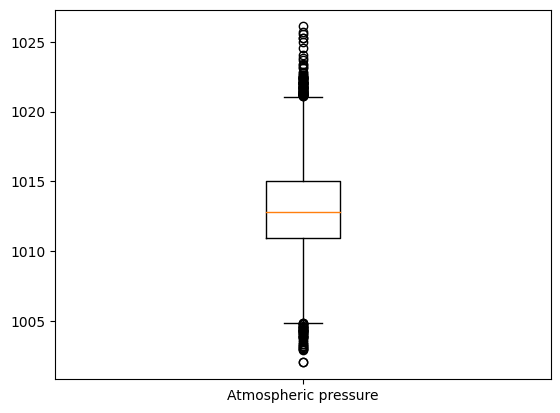

In [1052]:
plt.boxplot([data_completed['ความกดอากาศ(%)']],
             labels=['Atmospheric pressure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6c25d7f640>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6c25d7d960>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6c25d7da50>,
 'medians': [<matplotlib.lines.Line2D at 0x7b6c266be920>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b6c266bf1f0>,
 'means': []}

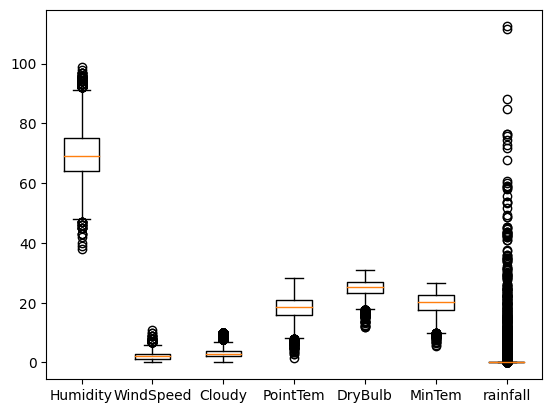

In [1053]:
plt.boxplot([data_completed['ความชื้นสัมพัทธ์(%)'],
             data_completed['ความเร็วลม(นอต)'],
             data_completed['จำนวนเมฆ(10ส่วน)'],
             data_completed['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'],
             data_completed['อุณหภูมิตุ้มแห้ง(เซลเซียส)'],
             data_completed['อุณหภูมิต่ำสุด(เซลเซียส)'],
             data_completed['ปริมาณฝน(มิลลิเมตร)']],
             labels=['Humidity', 'WindSpeed', 'Cloudy', 'PointTem', 'DryBulb', 'MinTem', 'rainfall'])

เมื่อดู boxplot ที่จำแนกตามสภาพอากาศแล้ว จะไม่แทนค่า outlier เนื่องจากข้อมูลที่เป็นค่า outlier นั้นมีเยอะเกินไป อาจทำให้ข้อมูลคลาดเคลื่อนได้

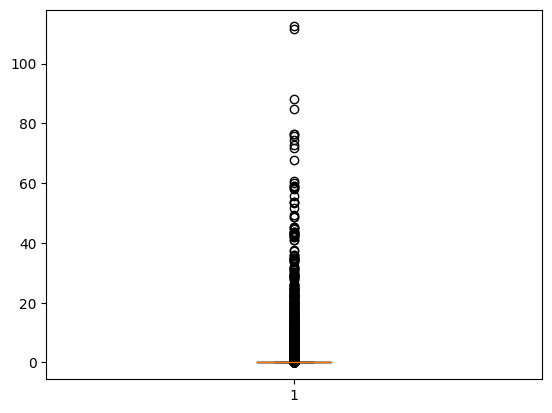

In [1054]:
ret_rain = plt.boxplot(data_completed['ปริมาณฝน(มิลลิเมตร)'],labels=['Rainfall'])

แต่จะแทนค่าในกรณีน้ำฝนแทน เนื่องจากมีค่าที่สูงมากๆอยู่ 2 จุดข้อมูล ที่มีค่าปริมาณน้ำฝนมากกว่า 100 มิลลิเมตร

In [1055]:
ret_rain

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6c2557ea70>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6c2557efb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6c2557e7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6c2557f4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6c2557f790>],
 'means': []}

In [1056]:
median = data_completed['ปริมาณฝน(มิลลิเมตร)'].median()
median

0.0

In [1057]:
data_completed.loc[data_completed['ปริมาณฝน(มิลลิเมตร)'] > 100]

,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
1,loey1,loey,2011-10-02,1006.51,95,2.0,10.0,23.5,25.1,24.3,111.4
485,loey485,loey,2014-10-21,1012.72,84,2.0,5.0,23.0,27.0,22.0,112.4


In [1058]:
data_completed.loc[data_completed['ปริมาณฝน(มิลลิเมตร)'] > 100, 'ปริมาณฝน(มิลลิเมตร)'] = np.nan
data_completed

,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011-10-01,1005.47,83,3.0,9.0,24.200000,27.6,24.8,1.4
1,kk1,kk,2011-10-02,1006.65,92,2.0,10.0,24.000000,25.6,23.0,17.7
2,kk2,kk,2011-10-03,1007.49,86,3.0,10.0,22.900000,25.6,22.1,3.0
3,kk3,kk,2011-10-04,1008.28,80,2.0,8.0,21.900000,25.8,22.8,0.0
4,kk4,kk,2011-10-05,1009.88,86,2.0,10.0,21.700000,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1542,loey1542,loey,2021-02-24,1008.39,69,1.0,0.0,17.300000,26.8,18.0,0.0
1543,loey1543,loey,2021-02-25,1006.05,61,1.0,0.0,13.000000,27.8,19.5,0.0
1544,loey1544,loey,2021-02-26,1004.86,55,2.0,0.0,13.800000,26.3,16.0,0.0
1545,loey1545,loey,2021-02-27,1005.76,56,1.0,2.0,15.200000,25.2,15.3,0.0


In [1059]:
data_completed.isnull().any()

id                              False
province_id                     False
Date                            False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)        False
ปริมาณฝน(มิลลิเมตร)              True
dtype: bool

In [1060]:
data_completed.fillna(median,inplace=True)

In [1061]:
data_completed.isnull().any()

id                              False
province_id                     False
Date                            False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)        False
ปริมาณฝน(มิลลิเมตร)             False
dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6c255921d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6c255925f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6c25591f30>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6c25592b30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6c25592dd0>],
 'means': []}

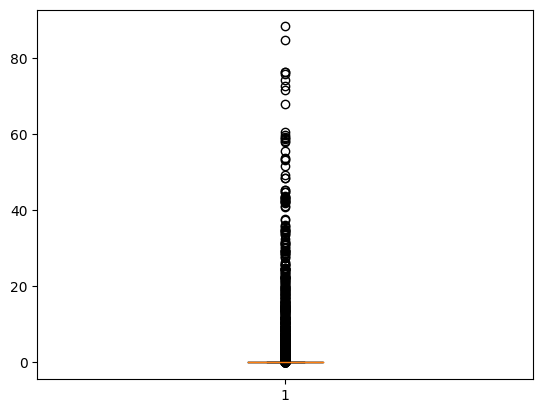

In [1062]:
plt.boxplot(data_completed['ปริมาณฝน(มิลลิเมตร)'])

In [1063]:
data_completed.loc[data_completed['ปริมาณฝน(มิลลิเมตร)'] > 100]

,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)


จะเห็นได้ว่าปริมาณน้ำฝนที่เกิร 100 มิลลิเมตร ได้หายไปแล้ว

In [1064]:
data_completed

,id,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011-10-01,1005.47,83,3.0,9.0,24.200000,27.6,24.8,1.4
1,kk1,kk,2011-10-02,1006.65,92,2.0,10.0,24.000000,25.6,23.0,17.7
2,kk2,kk,2011-10-03,1007.49,86,3.0,10.0,22.900000,25.6,22.1,3.0
3,kk3,kk,2011-10-04,1008.28,80,2.0,8.0,21.900000,25.8,22.8,0.0
4,kk4,kk,2011-10-05,1009.88,86,2.0,10.0,21.700000,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1542,loey1542,loey,2021-02-24,1008.39,69,1.0,0.0,17.300000,26.8,18.0,0.0
1543,loey1543,loey,2021-02-25,1006.05,61,1.0,0.0,13.000000,27.8,19.5,0.0
1544,loey1544,loey,2021-02-26,1004.86,55,2.0,0.0,13.800000,26.3,16.0,0.0
1545,loey1545,loey,2021-02-27,1005.76,56,1.0,2.0,15.200000,25.2,15.3,0.0


# Final
- เปลี่ยนชื่อคอลัมน์ให้เป็นตัวแปร x1 , x2 , x3 , ... , x7 และ y
- ทำการใส่ชื่อ จังหวัดลงใน province_id
- ทำการ sort date วันล่าสุดให้มาอยู่อยู่ข้างบน

## เปลี่ยนชื่อคอลัมน์ให้เป็นตัวแปร x1 , x2 , x3 , ... , x7 และ y

In [1073]:
data_completed.rename(columns={'ความกดอากาศ(%)' : 'X1 : ความกดอากาศ(%)'},inplace=True)
data_completed.rename(columns={'ความชื้นสัมพัทธ์(%)' : 'X2 : ความชื้นสัมพัทธ์(%)'},inplace=True)
data_completed.rename(columns={'ความเร็วลม(นอต)' : 'X3 : ความเร็วลม(นอต)'},inplace=True)
data_completed.rename(columns={'จำนวนเมฆ(10ส่วน)' : 'X4 : จำนวนเมฆ(10ส่วน)'},inplace=True)
data_completed.rename(columns={'อุณหภูมิจุดน้ำค้าง(เซลเซียส)' : 'X5 : อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
data_completed.rename(columns={'อุณหภูมิตุ้มแห้ง(เซลเซียส)' : 'X6 : อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
data_completed.rename(columns={'อุณหภูมิต่ำสุด(เซลเซียส)' : 'X7 : อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
data_completed.rename(columns={'ปริมาณฝน(มิลลิเมตร)' : 'Y : ปริมาณฝน(มิลลิเมตร)'},inplace=True)
data_completed

,id,province_id,Date,X1 : ความกดอากาศ(%),X2 : ความชื้นสัมพัทธ์(%),X3 : ความเร็วลม(นอต),X4 : จำนวนเมฆ(10ส่วน),X5 : อุณหภูมิจุดน้ำค้าง(เซลเซียส),X6 : อุณหภูมิตุ้มแห้ง(เซลเซียส),X7 : อุณหภูมิต่ำสุด(เซลเซียส),Y : ปริมาณฝน(มิลลิเมตร)
0,kk0,kk,2011-10-01,1005.47,83,3.0,9.0,24.200000,27.6,24.8,1.4
1,kk1,kk,2011-10-02,1006.65,92,2.0,10.0,24.000000,25.6,23.0,17.7
2,kk2,kk,2011-10-03,1007.49,86,3.0,10.0,22.900000,25.6,22.1,3.0
3,kk3,kk,2011-10-04,1008.28,80,2.0,8.0,21.900000,25.8,22.8,0.0
4,kk4,kk,2011-10-05,1009.88,86,2.0,10.0,21.700000,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1542,loey1542,loey,2021-02-24,1008.39,69,1.0,0.0,17.300000,26.8,18.0,0.0
1543,loey1543,loey,2021-02-25,1006.05,61,1.0,0.0,13.000000,27.8,19.5,0.0
1544,loey1544,loey,2021-02-26,1004.86,55,2.0,0.0,13.800000,26.3,16.0,0.0
1545,loey1545,loey,2021-02-27,1005.76,56,1.0,2.0,15.200000,25.2,15.3,0.0
